In [5]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
import PIL
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

tf.estimator package not installed.
tf.estimator package not installed.


In [ ]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

# !wget --no-check-certificate \
#     "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
#     -O "/tmp/cats-and-dogs.zip"


data_folder = os.path.abspath(".")
local_zip = data_folder + '/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(data_folder)
zip_ref.close()


In [2]:
print(len(os.listdir(os.path.abspath("PetImages/Cat/"))))
print(len(os.listdir(os.path.abspath("PetImages/Dog/"))))

# Expected Output:
# 12501
# 12501

12501
12501


In [ ]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    os.mkdir(os.path.abspath("cats-v-dogs"))
    os.mkdir(os.path.abspath("cats-v-dogs/training"))
    os.mkdir(os.path.abspath("cats-v-dogs/training/cats"))
    os.mkdir(os.path.abspath("cats-v-dogs/training/dogs"))
    os.mkdir(os.path.abspath("cats-v-dogs/testing"))
    os.mkdir(os.path.abspath("cats-v-dogs/testing/cats"))
    os.mkdir(os.path.abspath("cats-v-dogs/testing/dogs"))
except OSError:
    pass

In [ ]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  
  for file in os.listdir(SOURCE):
    if(os.path.getsize(os.path.join(SOURCE, file)) > 0):
      files.append(file)
    else:
      print(file + ' is zero length, so ignoring')
      
    
  training_length  = int(len(files) * SPLIT_SIZE)
  testing_length   = int(len(files) - training_length)
  shuffled_list    = random.sample(files, len(files))
  training_list    = shuffled_list[:training_length]
  testing_list     = shuffled_list[training_length:]
  
  for i,source_file in enumerate(training_list):
    source_file_path = os.path.join(SOURCE, source_file)
    copyfile(source_file_path, os.path.join(TRAINING, source_file))
      
  for i,source_file in enumerate(testing_list):
    source_file_path = os.path.join(SOURCE, source_file)
    copyfile(source_file_path, os.path.join(TESTING, source_file))

      
CAT_SOURCE_DIR = os.path.abspath("PetImages/Cat/")
TRAINING_CATS_DIR = os.path.abspath("cats-v-dogs/training/cats")
TESTING_CATS_DIR = os.path.abspath("cats-v-dogs/testing/cats")
DOG_SOURCE_DIR = os.path.abspath("PetImages/Dog/")
TRAINING_DOGS_DIR = os.path.abspath("cats-v-dogs/training/dogs")
TESTING_DOGS_DIR = os.path.abspath("cats-v-dogs/testing/dogs")

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

In [3]:
print(len(os.listdir(os.path.abspath("cats-v-dogs/training/cats/"))))
print(len(os.listdir(os.path.abspath("cats-v-dogs/training/dogs/"))))
print(len(os.listdir(os.path.abspath("cats-v-dogs/testing/cats/"))))
print(len(os.listdir(os.path.abspath("cats-v-dogs/testing/dogs/"))))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


In [6]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (7,7), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [7]:
TRAINING_DIR = os.path.abspath("cats-v-dogs/training/")
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=100,
    target_size=(150,150),
    class_mode='binary'
)

VALIDATION_DIR = os.path.abspath("cats-v-dogs/testing/")
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_generator = train_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=100,
    target_size=(150,150),
    class_mode='binary'
)



# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [8]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/100
 19/225 [=>............................] - ETA: 16:08 - loss: 0.7011 - acc: 0.5095

c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size

 25/225 [==>...........................] - ETA: 15:39 - loss: 0.6993 - acc: 0.4976

c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
c:\user

 82/225 [=========>....................] - ETA: 11:08 - loss: 0.6950 - acc: 0.5012

c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, l

 91/225 [===========>..................] - ETA: 10:26 - loss: 0.6946 - acc: 0.5040

c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


103/225 [============>.................] - ETA: 9:30 - loss: 0.6933 - acc: 0.5115

c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293863424 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, 

146/225 [==================>...........] - ETA: 6:09 - loss: 0.6893 - acc: 0.5260

c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


201/225 [=========================>....] - ETA: 1:51 - loss: 0.6851 - acc: 0.5400

c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 328728576 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
c:\users\carlina.cs\appdata\local\continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 5357. Skipping tag 513
  " Skipping tag %s" % (size

225/225 [==============================] - 1079s 5s/step - loss: 0.6808 - acc: 0.5491 - val_loss: 0.6386 - val_acc: 0.6408
Epoch 2/100
225/225 [==============================] - 1155s 5s/step - loss: 0.6348 - acc: 0.6372 - val_loss: 0.6221 - val_acc: 0.6484
Epoch 3/100
225/225 [==============================] - 1174s 5s/step - loss: 0.5972 - acc: 0.6822 - val_loss: 0.5811 - val_acc: 0.7040
Epoch 4/100
225/225 [==============================] - 1095s 5s/step - loss: 0.5680 - acc: 0.7071 - val_loss: 0.5535 - val_acc: 0.7204
Epoch 5/100
225/225 [==============================] - 1078s 5s/step - loss: 0.5427 - acc: 0.7283 - val_loss: 0.5136 - val_acc: 0.7432
Epoch 6/100
225/225 [==============================] - 1045s 5s/step - loss: 0.5238 - acc: 0.7418 - val_loss: 0.5073 - val_acc: 0.7544
Epoch 7/100
225/225 [==============================] - 1036s 5s/step - loss: 0.5073 - acc: 0.7543 - val_loss: 0.4823 - val_acc: 0.7760
Epoch 8/100
225/225 [==============================] - 1065s 5s/ste

225/225 [==============================] - 989s 4s/step - loss: 0.2201 - acc: 0.9050 - val_loss: 0.2096 - val_acc: 0.9176
Epoch 62/100
225/225 [==============================] - 989s 4s/step - loss: 0.2237 - acc: 0.9043 - val_loss: 0.1966 - val_acc: 0.9180
Epoch 63/100
225/225 [==============================] - 987s 4s/step - loss: 0.2148 - acc: 0.9093 - val_loss: 0.2084 - val_acc: 0.9132
Epoch 64/100
225/225 [==============================] - 974s 4s/step - loss: 0.2146 - acc: 0.9083 - val_loss: 0.2285 - val_acc: 0.8948
Epoch 65/100
225/225 [==============================] - 989s 4s/step - loss: 0.2122 - acc: 0.9107 - val_loss: 0.1970 - val_acc: 0.9252
Epoch 66/100
225/225 [==============================] - 1018s 5s/step - loss: 0.2145 - acc: 0.9075 - val_loss: 0.1996 - val_acc: 0.9192
Epoch 67/100
225/225 [==============================] - 988s 4s/step - loss: 0.2138 - acc: 0.9103 - val_loss: 0.2019 - val_acc: 0.9164
Epoch 68/100
225/225 [==============================] - 989s 4s/ste

Text(0.5, 1.0, 'Training and validation loss')

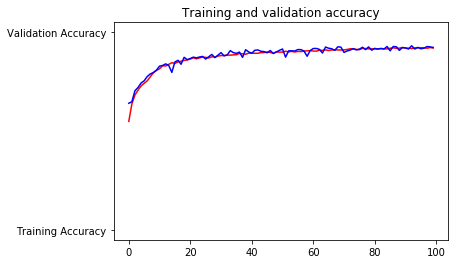

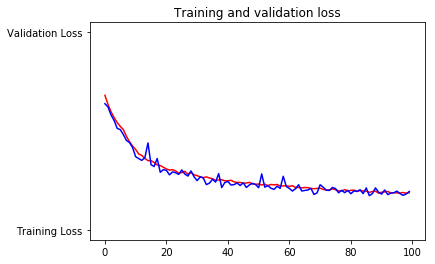

In [9]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [10]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(# YOUR CODE HERE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

SyntaxError: invalid syntax (<ipython-input-10-c099e8bfd509>, line 15)